<a href="https://colab.research.google.com/github/itsyashkhurana/Big-Data-Analystics/blob/main/BDA1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

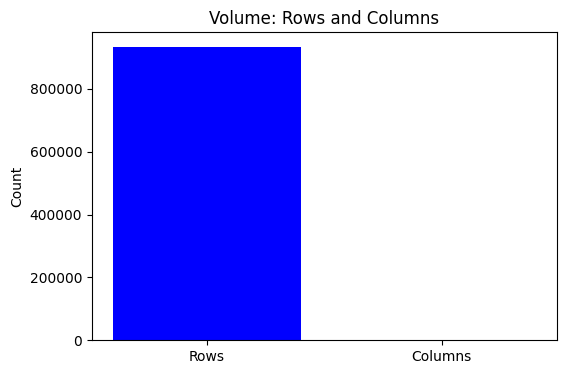

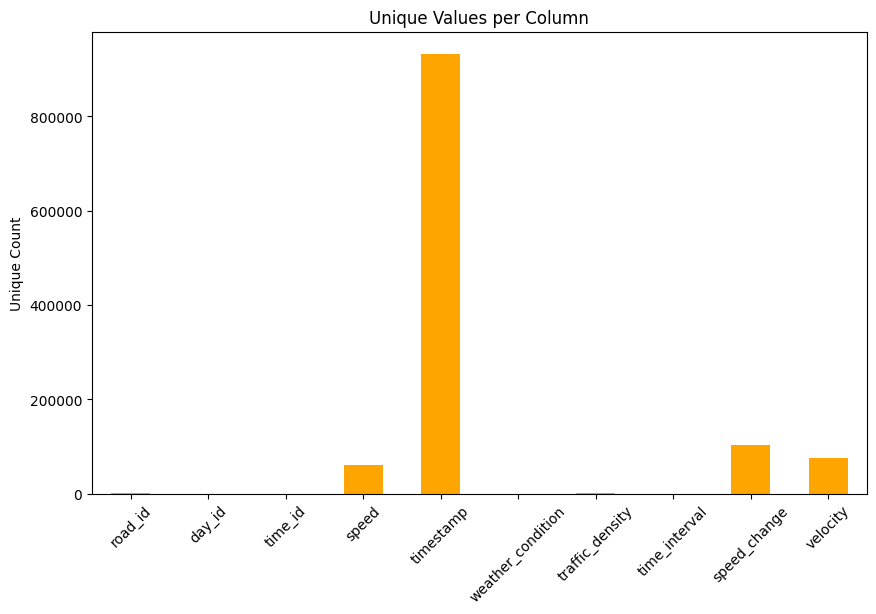

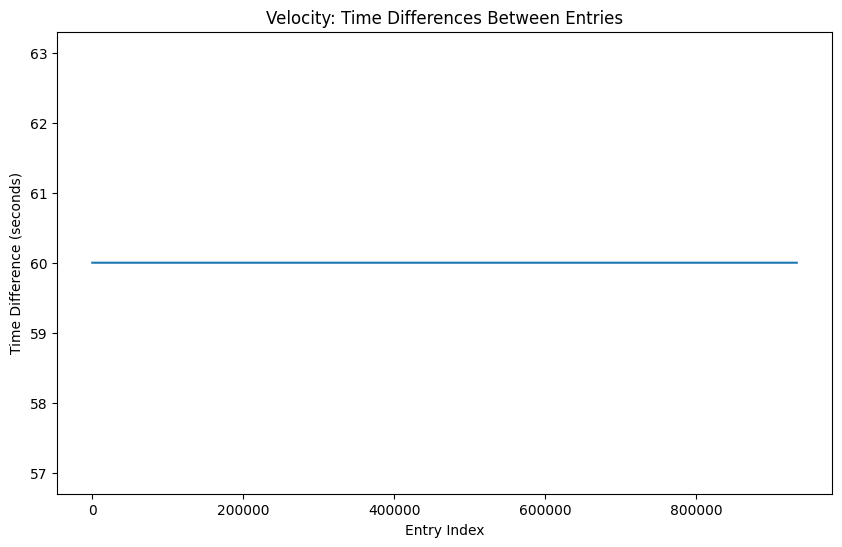

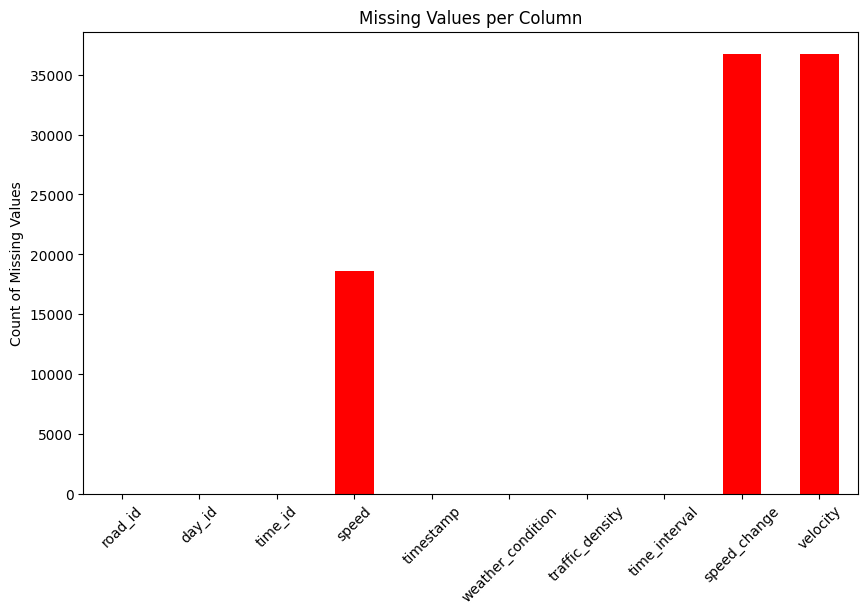

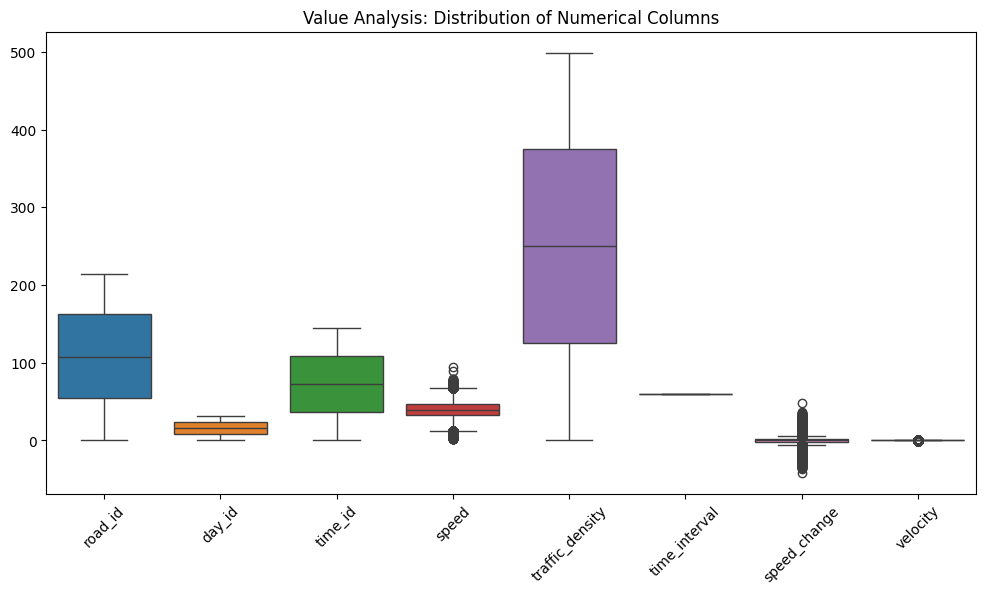

Volume: (932946, 10)
Variety: road_id                int64
day_id                 int64
time_id                int64
speed                float64
timestamp             object
weather_condition     object
traffic_density        int64
time_interval        float64
speed_change         float64
velocity             float64
dtype: object
Unique Values: road_id                 209
day_id                   31
time_id                 144
speed                 59765
timestamp            932946
weather_condition         4
traffic_density         500
time_interval             1
speed_change         102856
velocity              75387
dtype: int64
Velocity: 0 days 00:01:00
Missing Data: road_id                  0
day_id                   0
time_id                  0
speed                18572
timestamp                0
weather_condition        0
traffic_density          0
time_interval            1
speed_change         36774
velocity             36774
dtype: int64
Value Analysis:              road_i

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_big_data(dataset_path):
    # Load the dataset
    data = pd.read_csv(dataset_path)

    # Volume - Count number of rows and columns
    volume = data.shape
    plt.figure(figsize=(6, 4))
    plt.bar(['Rows', 'Columns'], volume, color=['blue', 'green'])
    plt.title("Volume: Rows and Columns")
    plt.ylabel("Count")
    plt.show()

    # Variety - Check data types and unique values
    variety = data.dtypes
    unique_values = data.nunique()
    plt.figure(figsize=(10, 6))
    unique_values.plot(kind='bar', color='orange')
    plt.title("Unique Values per Column")
    plt.ylabel("Unique Count")
    plt.xticks(rotation=45)
    plt.show()

    # Velocity - Estimate update frequency (if time-based data available)
    if 'timestamp' in data.columns:
        data['timestamp'] = pd.to_datetime(data['timestamp'])
        velocity = data['timestamp'].diff().mean()  # Average time between entries

        # Line plot for timestamp differences (velocity visualization)
        time_diffs = data['timestamp'].diff().dt.total_seconds().dropna()
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=range(len(time_diffs)), y=time_diffs)
        plt.title("Velocity: Time Differences Between Entries")
        plt.xlabel("Entry Index")
        plt.ylabel("Time Difference (seconds)")
        plt.show()
    else:
        velocity = "Not Applicable"

    # Veracity - Check for missing values or inconsistencies
    missing_data = data.isnull().sum()
    plt.figure(figsize=(10, 6))
    missing_data.plot(kind='bar', color='red')
    plt.title("Missing Values per Column")
    plt.ylabel("Count of Missing Values")
    plt.xticks(rotation=45)
    plt.show()

    # Value - Perform basic analysis (e.g., mean, median)
    value = data.describe()  # Summary statistics

    # Boxplot for numerical columns to visualize distribution
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data[numeric_cols])
        plt.title("Value Analysis: Distribution of Numerical Columns")
        plt.xticks(rotation=45)
        plt.show()

    # Return all 5 V's results
    return volume, variety, unique_values, velocity, missing_data, value

# Example usage
dataset_path = 'speeddata_Aug_updated_with_velocity.csv'
volume, variety, unique_values, velocity, missing_data, value = analyze_big_data(dataset_path)

# Output results
print("Volume:", volume)
print("Variety:", variety)
print("Unique Values:", unique_values)
print("Velocity:", velocity)
print("Missing Data:", missing_data)
print("Value Analysis:", value)
